In [2]:
import pykat
from pykat import finesse
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline
pykat.init_pykat_plotting(dpi=90)

                                              ..-
    PyKat 1.2.1           _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,
   `^-....____:   +.      www.gwoptics.org/pykat



In [3]:
base = finesse.kat()
base.verbose=False
base.parse("""
# KAGRA DRFPMI model under development
#
# Keiko Kokeyama, 12th Aug, 2020
# 

# ======== Constants ========================
const f1 16.881M
const f2 45.0159M
const mf1 -16.881M
const mf2 -45.0159M
const a 0.686
const pi 3.1415

# ======== Input optics =====================
l i1 1 0 n0
s s_eo0 0 n0 n_eo1
mod eom1 $f1 0.3 1 pm n_eo1 n_eo2
s s_eo1 0 n_eo2 n_eo3
mod eom2 $f2 0.3 1 pm n_eo3 n_eo4
s s_eo2 0 n_eo4 nREFL

## ======= PRC each mirror loss 45ppm =======
# PRC
m1 PRM 0.1 45e-6 0 nREFL npr1
s sLpr1 14.7615 npr1 npr2
bs1 PR2 500e-6 45e-6 0 $a npr3 npr2 nPOP nPOP2
s sLpr2 11.0661 npr3 npr4
bs1 PR3 50e-6 45e-6 0 $a dump dump npr4 npr5
s sLpr3 15.7638 npr5 npr6

# Michelson
bs bs1 0.5 0.5 0 45 npr6 n2 n3 n4
s lx 26.6649 n3 nx1
s ly 23.3351 n2 ny1

# X arm
m ITMX 0.996 0.004 0 nx1 nx2
s sx1 3000 nx2 nx3
m ETMX 0.999995 5e-06 0 nx3 nTMSX

# Y arm
m ITMY 0.996 0.004 90 ny1 ny2
s sy1 3000 ny2 ny3
m ETMY 0.999995 5e-06 90 ny3 nTMSY


# ========= SRC each mirror loss 45ppm =======
s sLsr3 15.7396 n4 nsr5
bs1 SR3 50e-6 45e-6 0 $a nsr5 nsr4 dump dump
s sLsr2 11.1115 nsr4 nsr3
bs1 SR2 500e-6 45e-6 0 $a nsr2 nsr3 nPOS dump
s sLsr1 14.7412 nsr2 nsr1
m1 SRM 0.3 0e-6 0 nsr1 nAS

## ===== amplitude detectors =====

ad CR_POP 0 nPOP
ad SB1p_POP $f1 nPOP
ad SB1m_POP $mf1 nPOP
ad SB2p_POP $f2 nPOP
ad SB2m_POP $mf2 nPOP

ad CR_TMSX 0_TMSX nTMSX
ad SB1p_TMSX $f1 nTMSX
ad SB1m_TMSX $mf1 nTMSX
ad SB2p_TMSX $f2 nTMSX
ad SB2m_TMSX $mf2 nTMSX

ad CR_POS 0 nPOS
ad SB1p_POS $f1 nPOS
ad SB1m_POS $mf1 nPOS
ad SB2p_POS $f2 nPOS
ad SB2m_POS $mf2 nPOS




""")


# Field Check (POP, TMSX)

<function matplotlib.pyplot.show(*args, **kw)>

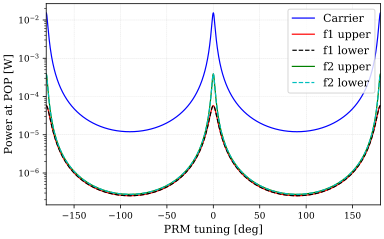

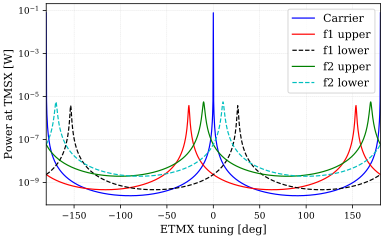

In [13]:
kat0 = base.deepcopy()
kat0.parse("""
xaxis* PRM phi lin -180 180 1000
""")

out = kat0.run()
plt.figure(1)
plt.semilogy(out.x, out["CR_POP"]**2,label="Carrier")
plt.semilogy(out.x, out["SB1p_POP"]**2,label="f1 upper")
plt.semilogy(out.x, out["SB1m_POP"]**2,label="f1 lower",LineStyle='--')
plt.semilogy(out.x, out["SB2p_POP"]**2,label="f2 upper")
plt.semilogy(out.x, out["SB2m_POP"]**2,label="f2 lower",LineStyle='--')
plt.xlabel("PRM tuning [deg]")
plt.ylabel("Power at POP [W]")
plt.legend(loc=1)
plt.show

kat1 = base.deepcopy()
kat1.parse("""
xaxis* ETMX phi lin -180 180 1000
""")

out1 = kat1.run()

plt.figure(2)
plt.semilogy(out.x, out1["CR_TMSX"]**2,label="Carrier")
plt.semilogy(out.x, out1["SB1p_TMSX"]**2,label="f1 upper")
plt.semilogy(out.x, out1["SB1m_TMSX"]**2,label="f1 lower",LineStyle='--')
plt.semilogy(out.x, out1["SB2p_TMSX"]**2,label="f2 upper")
plt.semilogy(out.x, out1["SB2m_TMSX"]**2,label="f2 lower",LineStyle='--')
plt.xlabel("ETMX tuning [deg]")
plt.ylabel("Power at TMSX [W]")
plt.legend(loc=1)
plt.show


# SRC tuning

<function matplotlib.pyplot.show(*args, **kw)>

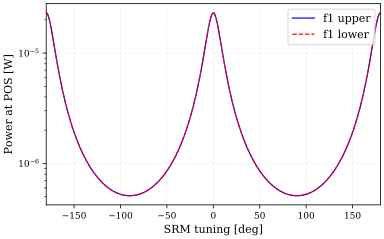

In [14]:
kats = base.deepcopy()
kats.parse("""
xaxis* SRM phi lin -180 180 1000
""")

out = kats.run()

plt.figure(1)
#plt.semilogy(out.x, out["CR_POS"]**2,label="Carrier") # CR => 0
plt.semilogy(out.x, out["SB1p_POS"]**2,label="f1 upper")
plt.semilogy(out.x, out["SB1m_POS"]**2,label="f1 lower",LineStyle='--')
#plt.semilogy(out.x, out["SB2p_POS"]**2,label="f2 upper")
#plt.semilogy(out.x, out["SB2m_POS"]**2,label="f2 lower",LineStyle='--')
plt.xlabel("SRM tuning [deg]")
plt.ylabel("Power at POS [W]")
plt.legend(loc=1)
plt.show

## Frequency Responses

### CARM
CARM has a pole.

<function matplotlib.pyplot.show(*args, **kw)>

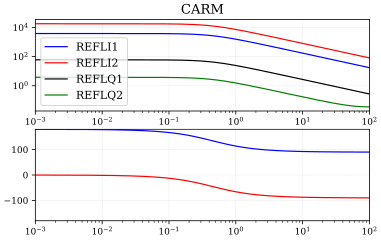

In [233]:
CARM = base.deepcopy()
CARM.parse("""
const fsb1 16.881M
const fsb2 45.0159M

fsig sig1 ETMX 10 0
fsig sig1 ETMY 10 0
xaxis sig1 f log .001 100 500


pd2 REFLI1 $fsb1 -0 10 nREFL
pd2 REFLQ1 $fsb1 90 10 nREFL

put REFLI1 f2 $x1
put REFLQ1 f2 $x1

pd2 REFLI2 $fsb2 -0.3 10 nREFL
pd2 REFLQ2 $fsb2 89.7 10 nREFL

put REFLI2 f2 $x1
put REFLQ2 f2 $x1

yaxis lin abs:deg

""")

out = CARM.run()

plt.subplot(2,1,1)
plt.loglog(out.x, np.abs(out["REFLI1"]),label="REFLI1")
plt.loglog(out.x, np.abs(out["REFLI2"]),label="REFLI2")
plt.loglog(out.x, np.abs(out["REFLQ1"]),label="REFLQ1")
plt.loglog(out.x, np.abs(out["REFLQ2"]),label="REFLQ2")
plt.xlim(0.001,100)
plt.title('CARM')
plt.legend()

plt.subplot(2,1,2)
plt.semilogx(out.x, np.angle(out["REFLI1"])*180/np.pi,label="REFLI1")
plt.semilogx(out.x, np.angle(out["REFLI2"])*180/np.pi,label="REFLI2")
plt.ylim(-180,180)

plt.show

In [7]:
### Searching pole...

print('Gain at DC is')
print(np.abs(out["REFLI1"][0]))
print('Gain at pole should be')
print(np.abs(out["REFLI1"][0])/np.sqrt(2))

print(np.abs(out["REFLI1"][264]))
print('Pole is at')
print(out.x[264])

Gain at DC is
3892.77149555314
Gain at pole should be
2752.6051221153234
2778.4741019583
Pole is at
0.436515832240166


### DARM

<function matplotlib.pyplot.show(*args, **kw)>

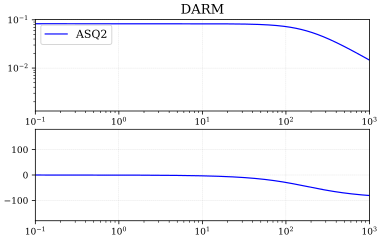

In [241]:
DARM = base.deepcopy()
DARM.parse("""
const fsb1 16.881M
const fsb2 45.0159M

fsig sig1 ETMX 10 0
fsig sig1 ETMY 10 180
xaxis sig1 f log .1 10000 1000

pd2 ASQ2 $fsb2 90 100 nAS
put ASQ2 f2 $x1

yaxis lin abs:deg

""")

out_darm = DARM.run()

plt.subplot(2,1,1)
plt.loglog(out_darm.x, np.abs(out_darm["ASQ2"]),label="ASQ2")
plt.xlim(0.1,1000)
plt.title('DARM')
plt.legend()

plt.subplot(2,1,2)
plt.semilogx(out_darm.x, np.angle(out_darm["ASQ2"])*180/np.pi,label="ASQ2")
plt.xlim(0.1,1000)
plt.ylim(-180,180)

plt.show

In [69]:
### Searching pole...

print('Gain at DC is')
print(np.abs(out_darm["ASQ2"][0]))
print('Gain at pole should be')
print(np.abs(out_darm["ASQ2"][0])/np.sqrt(2))

print(np.abs(out_darm["ASQ2"][651]))
print('Pole is at')
print(out_darm.x[651])

Gain at DC is
0.082916066053766
Gain at pole should be
0.05863051257592963
0.0584946602511422
Pole is at
179.887091512879


### PRCL

PRCL has a set of zero-pole. The pole frequency should be compared with the analytical prediction. 

<function matplotlib.pyplot.show(*args, **kw)>

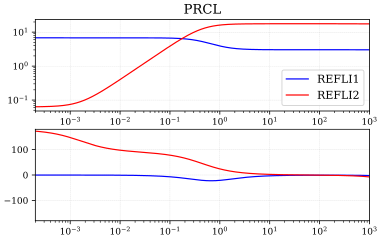

In [234]:
PRCL = base.deepcopy()
PRCL.parse("""
const fsb1 16.881M
const fsb2 45.0159M
fsig sig1 PRM 10 0
xaxis sig1 f log .0001 10000 5000

pd2 REFLI1 $fsb1 0 10 nREFL
pd2 REFLI2 $fsb2 0 10 nREFL

put REFLI1 f2 $x1
put REFLI2 f2 $x1

yaxis lin abs:deg
""")

out_prcl = PRCL.run()

plt.subplot(2,1,1)
plt.loglog(out_prcl.x, np.abs(out_prcl["REFLI1"]),label="REFLI1")
plt.loglog(out_prcl.x, np.abs(out_prcl["REFLI2"]),label="REFLI2")
plt.xlim(0.0002,1000)
plt.title('PRCL')
plt.legend()

plt.subplot(2,1,2)
plt.semilogx(out_prcl.x, np.angle(out_prcl["REFLI1"])*180/np.pi,label="REFLI1")
plt.semilogx(out_prcl.x, np.angle(out_prcl["REFLI2"])*180/np.pi,label="REFLI2")

plt.xlim(0.0002,1000)
plt.ylim(-180,180)

plt.show

In [235]:
### Searching pole...

print('Gain at DC is')
print(np.abs(out_prcl["REFLI1"][0]))
print('Gain at pole should be')
print(np.abs(out_prcl["REFLI1"][0])/np.sqrt(2))

print(np.abs(out_prcl["REFLI1"][2350]))
print('Pole is at')
print(out_prcl.x[2350])

Gain at DC is
6.82067432845063
Gain at pole should be
4.822945069912441
4.81145882279157
Pole is at
0.575439937337158


In [236]:
### Searching zero...

print('Gain at High freq is')
print(np.abs(out_prcl["REFLI1"][5000]))
print('Gain at zero should be')
print(np.abs(out_prcl["REFLI1"][5000])*np.sqrt(2))

print(np.abs(out_prcl["REFLI1"][2457]))
print('Zero is at')
print(out_prcl.x[2457])

Gain at High freq is
2.9309590313007194
Gain at zero should be
4.145002012825387
4.14242386425502
Zero is at
0.85349307161355


In [212]:
### Searching pole...

print('Gain at High freq is')
print(np.abs(out_prcl["REFLI2"][5000]))
print('Gain at zero should be')
print(np.abs(out_prcl["REFLI2"][5000])/np.sqrt(2))

print(np.abs(out_prcl["REFLI2"][2220]))
print('Pole is at')
print(out_prcl.x[2220])

Gain at High freq is
15.6408368341119
Gain at zero should be
11.059741788832856
11.0654724934498
Pole is at
0.356451133426245


In [231]:
### Searching zero...

print('Gain at High freq is')
print(np.abs(out_prcl["REFLI2"][0]))
print('Gain at zero should be')
print(np.abs(out_prcl["REFLI2"][0])*np.sqrt(2))

print(np.abs(out_prcl["REFLI2"][750]))
print('Zero is at')
print(out_prcl.x[750])

Gain at High freq is
0.062988244409885
Gain at zero should be
0.08907882951453067
0.0890310484128153
Zero is at
0.00158489319246112


## Demod phase tuning

### Mthod1 (ex PRCL)

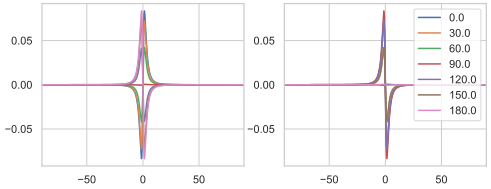

In [42]:
PRCL_sweep = base.deepcopy()
PRCL_sweep.parse("""
const fsb1 16.881M
const fsb2 45.0159M

var tuning 0
xaxis tuning phi lin -90 90 10000
put PRM phi $x1
yaxis lin abs

pd1 REFLI1 $fsb1 0 nREFL
pd1 REFLQ1 $fsb1 90 nREFL
pd1 POPI1 $fsb1 0 nPOP
pd1 POPQ1 $fsb1 90 nPOP
pd1 POSI1 $fsb1 0 nPOS
pd1 POSQ1 $fsb1 90 nPOS

pd1 ASI2 $fsb2 180 nAS
pd1 ASQ2 $fsb2 270 nAS
pd1 REFLI2 $fsb2 0 nREFL
pd1 REFLQ2 $fsb2 90 nREFL
pd1 POPI2 $fsb2 0 nPOP
pd1 POPQ2 $fsb2 90 nPOP
pd1 POSI2 $fsb2 0 nPOS
pd1 POSQ2 $fsb2 90 nPOS

""")

# Plot in different subplots
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8,3))

for pp in np.linspace(0,180,7):
    PRCL_sweep.REFLI1.phase1 = pp
    PRCL_sweep.REFLQ1.phase1 = pp+90
    PRCL = PRCL_sweep.run()
    ax1.plot(PRCL.x, PRCL["REFLI1"],label=pp)
    ax2.plot(PRCL.x, PRCL["REFLQ1"],label=pp)

plt.legend(loc=1)
plt.show()


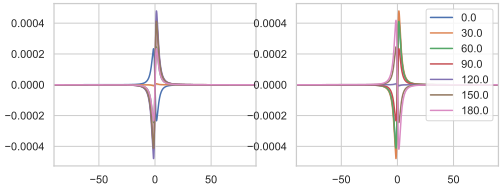

In [44]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8,3))

for pp in np.linspace(0,180,7):
    PRCL_sweep.POPI1.phase1 = pp
    PRCL_sweep.POPQ1.phase1 = pp+90
    PRCL = PRCL_sweep.run()
    ax1.plot(PRCL.x, PRCL["POPI1"],label=pp)
    ax2.plot(PRCL.x, PRCL["POPQ1"],label=pp)

plt.legend(loc=1)
plt.show()


## Method 2 

CARM
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


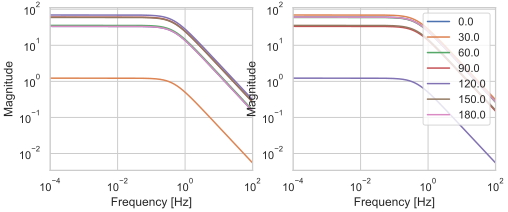

In [68]:
CARM = base.deepcopy()
CARM.parse("""
const fsb1 16.881M
const fstart 0.0001
const fend 100

fsig sig1 ETMX 10 0
fsig sig1 ETMY 10 0
xaxis sig1 f log $fstart $fend 1000

pd2 ASQ1 $fsb1 213 10 nAS
pd2 REFLI1 $fsb1 0 10 nREFL
pd2 REFLQ1 $fsb1 90 10 nREFL
pd2 POPI1 $fsb1 0 10 nPOP
pd2 POPQ1 $fsb1 90 10 nPOP
pd2 POSI1 $fsb1 0 10 nPOS
pd2 POSQ1 $fsb1 90 10 nPOS

put ASQ1 f2 $x1
put REFLI1 f2 $x1
put REFLQ1 f2 $x1
put POPI1 f2 $x1
put POPQ1 f2 $x1
put POSI1 f2 $x1
put POSQ1 f2 $x1
""")

out = CARM.run()

print("CARM")
print(np.sign(np.sin(np.angle(out["REFLI1"][0])))* np.abs(out["REFLI1"][0]))

# Plot in different subplots
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8,3))

for pp in np.linspace(0,180,7):
    CARM.POPI1.phase1 = pp
    CARM.POPQ1.phase1 = pp+90
    out = CARM.run()
    ax1.loglog(out.x, out["POPI1"],label=pp)
    ax2.loglog(out.x, out["POPQ1"],label=pp)
    print(np.sign(np.sin(np.angle(out["POPI1"][0])))* np.abs(out["POPQ1"][0]))
plt.legend(loc=1)

ax1.set(xlabel='Frequency [Hz]', ylabel='Magnitude')
ax2.set(xlabel='Frequency [Hz]', ylabel='Magnitude')
plt.show()


## Sensing Matrix (fsig)
### f1

In [16]:
DARM = base.deepcopy()
DARM.parse("""
const f1 16.881M
const fstart 0.001
const fend 10

fsig sig1 ETMX 10 0
fsig sig1 ETMY 10 180
xaxis sig1 f log $fstart $fend 200

pd2 ASQ1 $f1 213 10 nAS
pd2 REFLI1 $f1 0 10 nREFL
pd2 REFLQ1 $f1 90 10 nREFL
pd2 POPI1 $f1 119.21 10 nPOP
pd2 POPQ1 $f1 209.21 10 nPOP
pd2 POSI1 $f1 0 10 nPOS
pd2 POSQ1 $f1 90 10 nPOS

put ASQ1 f2 $x1
put REFLI1 f2 $x1
put REFLQ1 f2 $x1
put POPI1 f2 $x1
put POPQ1 f2 $x1
put POSI1 f2 $x1
put POSQ1 f2 $x1

yaxis lin abs:deg

""")
out = DARM.run()

print("DARM")
print(np.sign(np.sin(np.angle(out["ASQ1"][0])))* np.abs(out["ASQ1"][0]))
print(np.sign(np.sin(np.angle(out["REFLI1"][0])))* np.abs(out["REFLI1"][0]))
print(np.sign(np.sin(np.angle(out["REFLQ1"][0])))* np.abs(out["REFLQ1"][0]))
print(np.sign(np.sin(np.angle(out["POPI1"][0])))* np.abs(out["POPI1"][0]))
print(np.sign(np.sin(np.angle(out["POPQ1"][0])))* np.abs(out["POPQ1"][0]))
print(np.sign(np.sin(np.angle(out["POSI1"][0])))* np.abs(out["POSI1"][0]))
print(np.sign(np.sin(np.angle(out["POSQ1"][0])))* np.abs(out["POSQ1"][0]))


MICH = base.deepcopy()
MICH.parse("""
const f1 16.881M
const fstart 0.001
const fend 10

fsig sig1 ITMX 10 0
fsig sig1 ETMX 10 0
fsig sig1 ITMY 10 180
fsig sig1 ETMY 10 180

xaxis sig1 f log $fstart $fend 200

pd2 ASQ1 $f1 213 10 nAS
pd2 REFLI1 $f1 0 10 nREFL
pd2 REFLQ1 $f1 90 10 nREFL
pd2 POPI1 $f1 119.21 10 nPOP
pd2 POPQ1 $f1 209.21 10 nPOP
pd2 POSI1 $f1 0 10 nPOS
pd2 POSQ1 $f1 90 10 nPOS

put ASQ1 f2 $x1
put REFLI1 f2 $x1
put REFLQ1 f2 $x1
put POPI1 f2 $x1
put POPQ1 f2 $x1
put POSI1 f2 $x1
put POSQ1 f2 $x1

yaxis lin abs:deg

""")
del out
out = MICH.run()

print("MICH")
print(np.sign(np.sin(np.angle(out["ASQ1"][0])))* np.abs(out["ASQ1"][0]))
print(np.sign(np.sin(np.angle(out["REFLI1"][0])))* np.abs(out["REFLI1"][0]))
print(np.sign(np.sin(np.angle(out["REFLQ1"][0])))* np.abs(out["REFLQ1"][0]))
print(np.sign(np.sin(np.angle(out["POPI1"][0])))* np.abs(out["POPI1"][0]))
print(np.sign(np.sin(np.angle(out["POPQ1"][0])))* np.abs(out["POPQ1"][0]))
print(np.sign(np.sin(np.angle(out["POSI1"][0])))* np.abs(out["POSI1"][0]))
print(np.sign(np.sin(np.angle(out["POSQ1"][0])))* np.abs(out["POSQ1"][0]))


CARM = base.deepcopy()
CARM.parse("""
const f1 16.881M
const fstart 0.001
const fend 10

fsig sig1 ETMX 10 0
fsig sig1 ETMY 10 0
xaxis sig1 f log $fstart $fend 200

pd2 ASQ1 $f1 213 10 nAS
pd2 REFLI1 $f1 0 10 nREFL
pd2 REFLQ1 $f1 90 10 nREFL
pd2 POPI1 $f1 119.21 10 nPOP
pd2 POPQ1 $f1 209.21 10 nPOP
pd2 POSI1 $f1 0 10 nPOS
pd2 POSQ1 $f1 90 10 nPOS

put ASQ1 f2 $x1
put REFLI1 f2 $x1
put REFLQ1 f2 $x1
put POPI1 f2 $x1
put POPQ1 f2 $x1
put POSI1 f2 $x1
put POSQ1 f2 $x1

yaxis lin abs:deg

""")
del out
out = CARM.run()

print("CARM")
print(np.sign(np.sin(np.angle(out["ASQ1"][0])))* np.abs(out["ASQ1"][0]))
print(np.sign(np.sin(np.angle(out["REFLI1"][0])))* np.abs(out["REFLI1"][0]))
print(np.sign(np.sin(np.angle(out["REFLQ1"][0])))* np.abs(out["REFLQ1"][0]))
print(np.sign(np.sin(np.angle(out["POPI1"][0])))* np.abs(out["POPI1"][0]))
print(np.sign(np.sin(np.angle(out["POPQ1"][0])))* np.abs(out["POPQ1"][0]))
print(np.sign(np.sin(np.angle(out["POSI1"][0])))* np.abs(out["POSI1"][0]))
print(np.sign(np.sin(np.angle(out["POSQ1"][0])))* np.abs(out["POSQ1"][0]))


PRCL = base.deepcopy()
PRCL.parse("""
const f1 16.881M
const fstart 0.001
const fend 10

fsig sig1 PRM 10 0
xaxis sig1 f log $fstart $fend 200

pd2 ASQ1 $f1 213 10 nAS
pd2 REFLI1 $f1 0 10 nREFL
pd2 REFLQ1 $f1 90 10 nREFL
pd2 POPI1 $f1 119.21 10 nPOP
pd2 POPQ1 $f1 209.21 10 nPOP
pd2 POSI1 $f1 0 10 nPOS
pd2 POSQ1 $f1 90 10 nPOS

put ASQ1 f2 $x1
put REFLI1 f2 $x1
put REFLQ1 f2 $x1
put POPI1 f2 $x1
put POPQ1 f2 $x1
put POSI1 f2 $x1
put POSQ1 f2 $x1

yaxis lin abs:deg

""")
del out
out = PRCL.run()

print("PRCL")
print(np.sign(np.sin(np.angle(out["ASQ1"][0])))* np.abs(out["ASQ1"][0]))
print(np.sign(np.sin(np.angle(out["REFLI1"][0])))* np.abs(out["REFLI1"][0]))
print(np.sign(np.sin(np.angle(out["REFLQ1"][0])))* np.abs(out["REFLQ1"][0]))
print(np.sign(np.sin(np.angle(out["POPI1"][0])))* np.abs(out["POPI1"][0]))
print(np.sign(np.sin(np.angle(out["POPQ1"][0])))* np.abs(out["POPQ1"][0]))
print(np.sign(np.sin(np.angle(out["POSI1"][0])))* np.abs(out["POSI1"][0]))
print(np.sign(np.sin(np.angle(out["POSQ1"][0])))* np.abs(out["POSQ1"][0]))

SRCL = base.deepcopy()
SRCL.parse("""
const f1 16.881M
const fstart 0.001
const fend 10

fsig sig1 PRM 10 0
xaxis sig1 f log $fstart $fend 200

pd2 ASQ1 $f1 213 10 nAS
pd2 REFLI1 $f1 0 10 nREFL
pd2 REFLQ1 $f1 90 10 nREFL
pd2 POPI1 $f1 119.21 10 nPOP
pd2 POPQ1 $f1 209.21 10 nPOP
pd2 POSI1 $f1 0 10 nPOS
pd2 POSQ1 $f1 90 10 nPOS

put ASQ1 f2 $x1
put REFLI1 f2 $x1
put REFLQ1 f2 $x1
put POPI1 f2 $x1
put POPQ1 f2 $x1
put POSI1 f2 $x1
put POSQ1 f2 $x1

yaxis lin abs:deg

""")
del out
out = SRCL.run()

print("SRCL")
print(np.sign(np.sin(np.angle(out["ASQ1"][0])))* np.abs(out["ASQ1"][0]))
print(np.sign(np.sin(np.angle(out["REFLI1"][0])))* np.abs(out["REFLI1"][0]))
print(np.sign(np.sin(np.angle(out["REFLQ1"][0])))* np.abs(out["REFLQ1"][0]))
print(np.sign(np.sin(np.angle(out["POPI1"][0])))* np.abs(out["POPI1"][0]))
print(np.sign(np.sin(np.angle(out["POPQ1"][0])))* np.abs(out["POPQ1"][0]))
print(np.sign(np.sin(np.angle(out["POSI1"][0])))* np.abs(out["POSI1"][0]))
print(np.sign(np.sin(np.angle(out["POSQ1"][0])))* np.abs(out["POSQ1"][0]))




DARM
-511.00421499680806
9.330881770792329e-06
0.00257156950908177
8.56125405396952e-08
-2.66262303715361e-05
-0.950749062081785
0.528272670006362
MICH
-0.512027988774889
-0.00182925767528853
-0.504843604860648
1.67808291581451e-05
0.00522718987371789
-0.0009526538447249211
0.00052933104035118
CARM
-6.38799965104062e-07
3892.77149555314
60.4010575991709
69.261788247277
-0.273556086965197
-1.18851948742606e-09
6.60387044297867e-10
PRCL
6.2221325139996e-10
-6.82162119025133
-0.03662233808818171
-0.039155795334335504
3.91423255216535e-05
1.15765907173009e-12
-6.432398128701349e-13
SRCL
6.2221325139996e-10
-6.82162119025133
-0.03662233808818171
-0.039155795334335504
3.91423255216535e-05
1.15765907173009e-12
-6.432398128701349e-13
